In [1]:
# 📌 Step 1: Import Required Libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [9]:
# 📌 Step 2: Load Cleaned Data and Prepare Features

# Load the cleaned dataset
df = pd.read_csv("liver_cleaned.csv")

# 📋 Optional: Check column names
print("Columns in dataset:", df.columns.tolist())

# ✅ Rename target column if necessary
# Try to detect and rename the target column to 'target'
if 'target' not in df.columns:
    possible_target_cols = ['dataset', 'class', 'label']
    found = False
    for col in possible_target_cols:
        if col in df.columns:
            df.rename(columns={col: 'target'}, inplace=True)
            found = True
            break
    if not found:
        raise KeyError("The 'target' column is not found. Please check your dataset.")

print("Original target values:", df['target'].unique())
df['target'] = df['target'].replace({-1: 0, 2: 1})  # Adjust if needed
df['target'] = df['target'].astype(int)
print("Cleaned target values:", df['target'].unique())
# ✅ Proceed with splitting
X = df.drop("target", axis=1)
y = df["target"]

# 🚀 Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Confirmation
print("✅ Data loaded and split successfully.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test :", X_test.shape)


Columns in dataset: ['age', 'gender', 'total_bilirubin', 'direct_bilirubin', 'alkaline_phosphotase', 'alamine_aminotransferase', 'aspartate_aminotransferase', 'total_protiens', 'albumin', 'albumin_and_globulin_ratio', 'dataset']
Original target values: [-0.63359475  1.57829591]
Cleaned target values: [0 1]
✅ Data loaded and split successfully.
Shape of X_train: (466, 10)
Shape of X_test : (117, 10)


In [10]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [17]:
# 📌 Step 4: Define Evaluation Function

def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"📊 Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")


📊 Model: Logistic Regression
Accuracy: 0.6923076923076923
Precision: 0.42857142857142855
Recall: 0.17647058823529413
F1 Score: 0.25
ROC AUC: 0.7381289865343728
Confusion Matrix:
 [[75  8]
 [28  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.90      0.81        83
           1       0.43      0.18      0.25        34

    accuracy                           0.69       117
   macro avg       0.58      0.54      0.53       117
weighted avg       0.64      0.69      0.64       117

--------------------------------------------------
📊 Model: Random Forest
Accuracy: 0.5982905982905983
Precision: 0.21739130434782608
Recall: 0.14705882352941177
F1 Score: 0.17543859649122806
ROC AUC: 0.631467044649185
Confusion Matrix:
 [[65 18]
 [29  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73        83
           1       0.22      0.15      0.18        34

    ac

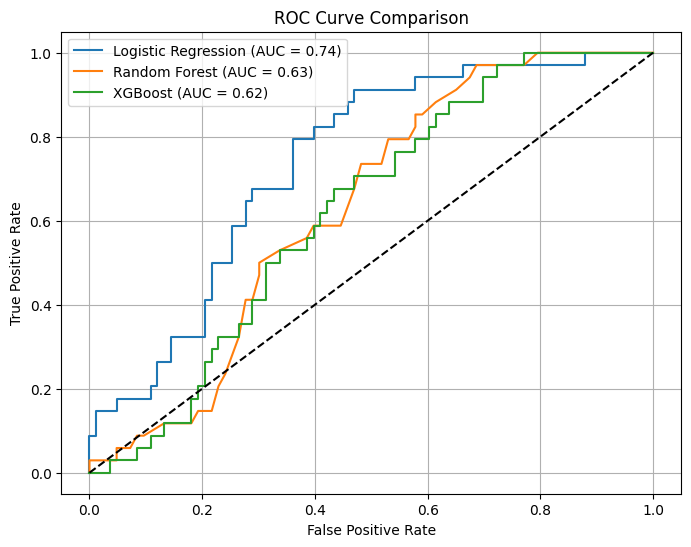

In [18]:
# 📌 Step 5: Evaluate All Models and Plot ROC Curves

plt.figure(figsize=(8, 6))

evaluate_model(lr_model, X_test, y_test, "Logistic Regression")
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# 📌 Step 6: Save the Best Model

# Let's say XGBoost is the best – save it
joblib.dump(xgb_model, "liver_model.pkl")
print("✅ XGBoost liver model saved as 'liver_model.pkl'")


✅ XGBoost liver model saved as 'liver_model.pkl'
